# Skyrmion simulation
Lets simulate the relaxation of a Skyrmion

In [6]:
import mumax3c as mc
import discretisedfield as df
import micromagneticmodel as mm

In [7]:
region = df.Region(
    p1=(-50e-9, -50e-9, 0),
    p2=(50e-9, 50e-9, 10e-9)
)

mesh = df.Mesh(
    region=region,
    cell=(5e-9, 5e-9, 5e-9)
)

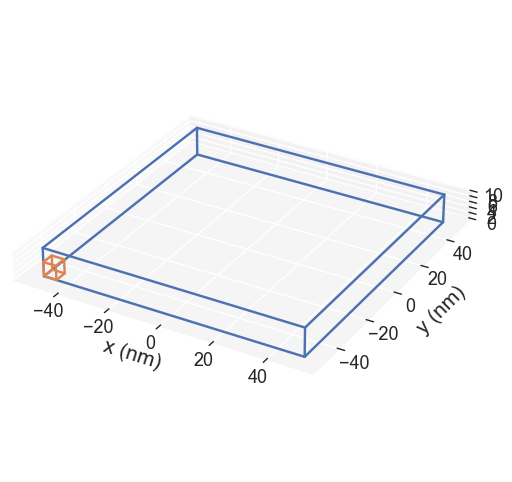

In [11]:
mesh.mpl()

In [12]:
system = mm.System(name='skyrmion')

system.energy = (
    mm.Exchange(A=1.6e-11)
    + mm.DMI(D=4e-3, crystalclass="Cnv_z")
    + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1))
    + mm.Demag()
    + mm.Zeeman(H=(0, 0, 2e5))
)

In [14]:
system.energy

Exchange(A=1.6e-11) + DMI(D=0.004, crystalclass='Cnv_z') + UniaxialAnisotropy(K=510000.0, u=(0, 0, 1)) + Demag() + Zeeman(H=(0, 0, 200000.0))

In [15]:
Ms = 1.1e6

def Ms_fun(pos):
    x, y, z = pos
    r = 50e-9
    if (x**2 + y**2)**0.5 < r:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    r = 10e-9
    if (x**2 + y**2)**0.5 < r:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

In [16]:
system.m = df.Field(
    mesh,
    nvdim=3,
    value=m_init,
    norm=Ms_fun,
    valid='norm'
)

In [17]:
system.m.norm.hv(kdims=["x", "y"])

:DynamicMap   [z]
   :Image   [x,y]   (field)

O:\UNI\maestria_2025\micromagnetics\notes\.venv\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
O:\UNI\maestria_2025\micromagnetics\notes\.venv\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


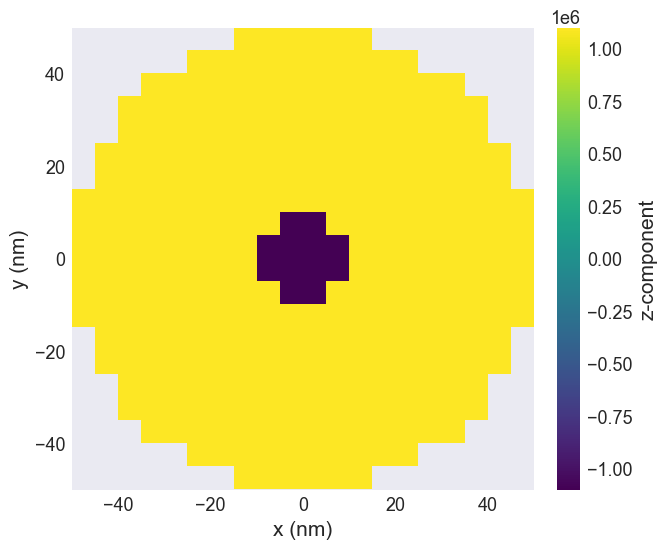

In [18]:
system.m.sel("z").mpl()

Running mumax3 (ExeMumax3Runner)[2025/05/31 15:45]... (1.6 s)


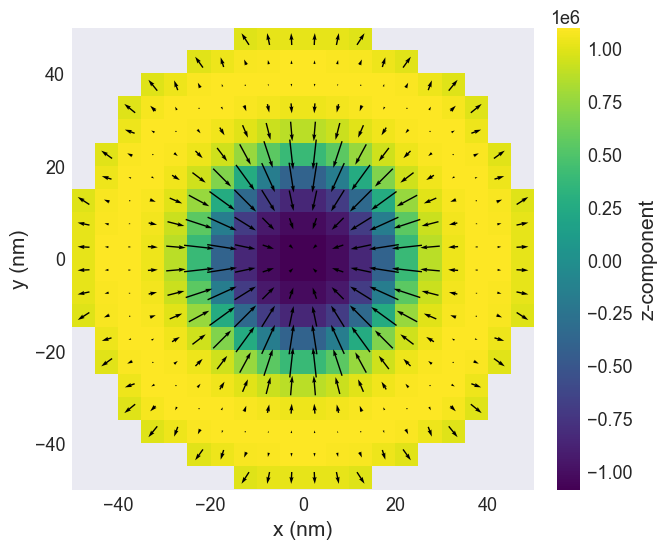

In [19]:
md = mc.MinDriver()
md.drive(system)

system.m.sel("z").mpl()

In [21]:
system.m

Field(Mesh(Region(pmin=[-5e-08, -5e-08, 0.0], pmax=[5e-08, 5e-08, 1e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 20, 2]), nvdim=3, vdims: (x, y, z))